<a href="https://colab.research.google.com/github/Bingyy/MachineLearning/blob/master/%E4%BA%8C%E5%88%86%E7%B1%BB%E5%AE%9E%E4%BE%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
# 导入数据
filename = 'http://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data'
data = pd.read_csv(filename, header=None)

In [3]:
data.shape

(208, 61)

### 数据集描述

每一条记录都是记录了60种不同的声呐探测结果，然后一个分类结果，如果是岩石则标记为R，金属则标记为M。

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [0]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix # 非常好用的函数
from pandas import set_option
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [6]:
# 分析数据
data.dtypes


0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
       ...   
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

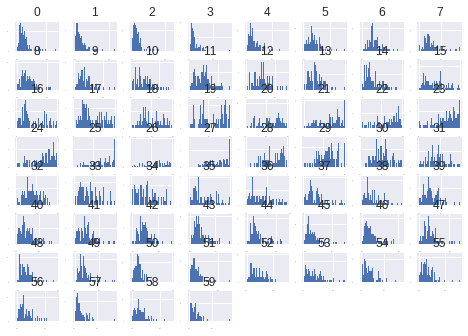

In [10]:
# 数据可视化
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1,bins=100)
plt.show()

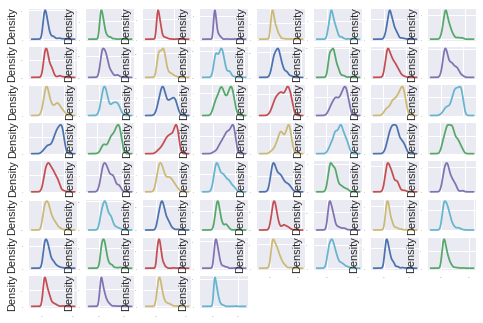

In [11]:
# 密度图
data.plot(kind="density", subplots=True, layout=(8,8), sharex=False, sharey=False, legend=False,fontsize=1)
plt.show()

数据呈现一定的偏态分布，所以可以通过Box-Cox转换以提高模型的准确度。

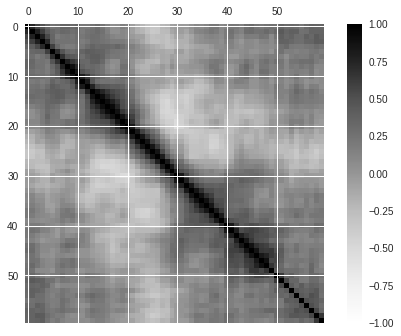

In [13]:
# 关系矩阵图
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

数据显示出一定的负相关性，我们可以看到两块白色地带。

In [0]:
# 分离评估数据集
# 20% 80%
array = data.values
X = array[:, 0:60].astype(float)
y = array[:, 60]
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.2, random_state=seed)

In [15]:
X_train.shape

(166, 60)

In [16]:
X_test.shape

(42, 60)

In [0]:
# 算法评估
# 帮助我们选择出合适的算法
num_folds = 10
seed = 7
scoring = 'accuracy'
models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = DecisionTreeClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()

In [18]:
# 用默认参数得出一个baseline
results = []
for key in models:
  kfold = model_selection.KFold(n_splits=num_folds, random_state=seed)
  cv_result = model_selection.cross_val_score(models[key], X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_result)
  print("%s : %f (%f)" % (key, cv_result.mean(), cv_result.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

LR : 0.782721 (0.093796)
LDA : 0.746324 (0.117854)
KNN : 0.681985 (0.117558)
CART : 0.765074 (0.077511)
NB : 0.648897 (0.141868)
SVM : 0.608824 (0.118656)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default 

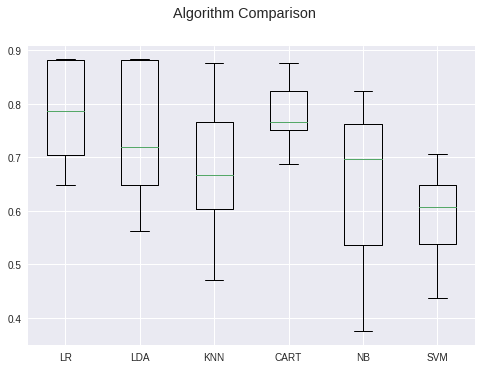

In [20]:
# 评估算法之箱线图
fig = plt.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

In [22]:
# 评估算法 -- 正态化数据
pipelines = {}
pipelines['ScalerLR'] = Pipeline([('Scaler', preprocessing.StandardScaler()), ('LR', LogisticRegression())])
pipelines['ScalerLDA'] = Pipeline([('Scaler', preprocessing.StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])
pipelines['ScalerKNN'] = Pipeline([('Scaler', preprocessing.StandardScaler()), ('KNN', KNeighborsClassifier())])
pipelines['ScalerCART'] = Pipeline([('Scaler', preprocessing.StandardScaler()), ('CART', DecisionTreeClassifier())])
pipelines['ScalerNB'] = Pipeline([('Scaler', preprocessing.StandardScaler()), ('NB', GaussianNB())])
pipelines['ScalerSVM'] = Pipeline([('Scaler', preprocessing.StandardScaler()), ('SVM', SVC())])

results = []
for key in pipelines:
  kfold = model_selection.KFold(n_splits=num_folds, random_state=seed)
  cv_result = model_selection.cross_val_score(pipelines[key], X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_result)
  print('%s : %f (%f)' % (key, cv_result.mean(), cv_result.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

ScalerLR : 0.734191 (0.095885)
ScalerLDA : 0.746324 (0.117854)
ScalerKNN : 0.825735 (0.054511)
ScalerCART : 0.741176 (0.111564)
ScalerNB : 0.648897 (0.141868)
ScalerSVM : 0.836397 (0.088697)


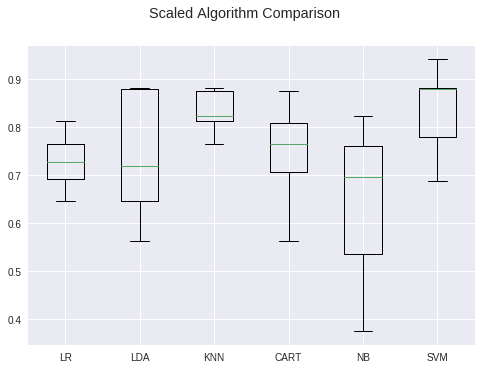

In [23]:
# 评估算法之箱线图
fig = plt.figure()
fig.suptitle("Scaled Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

In [0]:
# 算法调参以及集成算法，确定最终模型都和回归问题一样